<h1 align=center><font size = 5>Capstone - ACME Startup Relocation in New York City</font></h1>

## Introduction/Problem

ACME Start is a Machine Learning (ML) startup in New York City that recently received Series A Funding in the amount of $20M USD. ACME currently has 10 employees and is looking to grow to 20 employees by years end.  The startup has outgrown its current location and needs to relocate to accommodate current and future employees.  

## Data
The Chief Executive Officer (CEO) is concerned that the relocation may result in staff attrition so the CEO asks the Human Resources (HR) Director to perform a survey of employees. The survey asks employees to rank factors that the company will incorporate in the selection of the new location. These factors include proximity to mass resturants, parks, and gyms. The HR Director will use these results of the survey and Foursquare location data to prepare a report of suitable locations for the relocation.


## Methodology
<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab1_fig2_datascience_methodology_flowchart.png" width = 500> 

### Business Understanding
The HR Director is the lead for this analysis.  She understands that office relocations can be stressful for employees and at time bring about unwanted attrition so she will prioritize employee engagement.

### Analytics Approach
The HR Director has asked the Data Science team to conduct a survey to of employees to gauge employee sentiment and use the information learned in that survey to guide the data analysis.

### Data Requirements
The Data Science team will center their analysis on three data sources:
- Employee Survey
- New York City Maps
- Foursquare Location Data

### Data Collection
The Data Science team has collected the raw survey results from employees using SurveyMonkey.  The team downloaded mapping files from the NY city website.  The team signed up for a Foursquare account to access data using the Foursquare API.

### Data Understanding
The Data Science team will use standard data exploration techniques on each data source to learn the structure and dimensions of all data.

### Data Preparation
The Data Science team will transform data, making sure their are no missing data values, and incorrect data types.  The team will impute missing data from available data. Also, the team will map Foursquare Venue Categories to the ranked features that employees called for in the survey. All data transformation steps will be documented in the Notebook.  

### Modeling
The Data Science team will furnish maps of potential sites and segment the sites by their features. The team decided to use clustering and segementation techniques as they perform well on geographical data where unsupervised learning is needed. The team will use K-means with K=5.

### Evaluation
The Data Science team will evaluate sites for suitability by determining what venues are within 200 meters of potential locations.  

### Deployment
The Data Science team will present findings to the HR Director and CEO.  

### Feedback
The Data Science team will solicit feedback from the HR Director and CEO, both of whom may ask for additional factors to be included in the analysis.





## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Datasets</a>

2. <a href="#item2">Explore Neighborhoods in New York City</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

import re 

print('Libraries imported.')

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 
  - https://repo.continuum.io/pkgs/main/osx-64/_ipyw_jlab_nb_ext_conf-0.1.0-py36h2fc01ae_0.tar.bz2::_ipyw_jlab_nb_ext_conf-0.1.0-py36h2fc01ae_0, https://repo.continuum.io/pkgs/main/osx-64/conda-build-3.0.27-py36hb78d8cd_0.tar.bz2::conda-build-3.0.27-py36hb78d8cd_0, https://repo.continuum.io/pkgs/main/osx-64/conda-verify-2.0.0-py36he837df3_0.tar.bz2::conda-verify-2.0.0-py36he837df3_0, https://repo.continuum.io/pkgs/main/osx-64/navigator-updater-0.1.0-py36h7aee5fb_0.tar.bz2::navigator-updater-0.1.0-py36h7aee5fb_0
  - defaults::_ipyw_jlab_nb_ext_conf-0.1.0-py36h2fc01ae_0, https://repo.continuum.io/pkgs/main/osx-64/conda-build-3.0.27-py36hb78d8cd_0.tar.bz2::conda-build-3.0.27-py36hb78d8cd_0, https://repo.continuum.io/pkgs/main/osx-64/conda-verify-2.0.0-py36h

<a id='item1'></a>

## 1. Download and Explore Datasets

### Survey Dataset

The Chief Executive Officer (CEO) is concerned that the relocation may result in staff attrition so the CEO asks the Human Resources (HR) Director to perform a survey of employees. The survey asks employees to rank factors that the company will incorporate in the selection of the new location. Some of these factors include proximity to mass transit, childcare, parks, and gyms. The HR Director will use these results of the survey and Foursquare location data to prepare a report of suitable locations for the relocation.

In [4]:
raw_survey_df = pd.read_csv('ACME_Startup_Survey.csv')

In [5]:
raw_survey_df.shape

(10, 5)

In [6]:
raw_survey_df

,SurveyID,JobFamily,Resturants,Gyms,Parks
0,1,Developer,3.0,1,2.0
1,2,Management,5.0,NaN,NaN
2,3,Management,2.0,5,4.0
3,4,Developer,NaN,1,5.0
4,5,Developer,1.0,1,NaN
5,6,Marketing/Sales,3.0,NaN,1.0
6,7,Marketing/Sales,NaN,5,1.0
7,8,Developer,2.0,3,5.0
8,9,Data Scientist,2.0,3,1.0
9,10,Data Scientist,5.0,,3.0


Fix data issue with empty data not identified with NaN

In [7]:
raw_survey_df.replace(" ", np.nan, inplace = True)

Check the datatypes

In [8]:
raw_survey_df.dtypes

SurveyID        int64
JobFamily      object
Resturants    float64
Gyms           object
Parks         float64
dtype: object

Change the data type of Gyms to float64

In [9]:
raw_survey_df['Gyms'] = raw_survey_df['Gyms'].astype("float")

Deal with missing data

In [10]:
avgResturants = raw_survey_df['Resturants'].astype("float").mean(axis=0)
raw_survey_df["Resturants"].replace(np.nan, avgResturants, inplace=True)
print('Set missing Resturants to Average Resturants:',avgResturants)

avgGyms = raw_survey_df['Gyms'].astype("float").mean(axis=0)
raw_survey_df["Gyms"].replace(np.nan, avgGyms, inplace=True)
print('Set missing Gyms to Average Gyms:',avgGyms)

avgParks = raw_survey_df['Parks'].astype("float").mean(axis=0)
raw_survey_df["Parks"].replace(np.nan, avgParks, inplace=True)
print('Set missing Parks to Average Parks:',avgParks)

Set missing Resturants to Average Resturants: 2.875
Set missing Gyms to Average Gyms: 2.7142857142857144
Set missing Parks to Average Parks: 2.75


Saved transformed data as survey dataframe

In [11]:
survey_df = raw_survey_df
survey_df

,SurveyID,JobFamily,Resturants,Gyms,Parks
0,1,Developer,3.000,1.000000,2.00
1,2,Management,5.000,2.714286,2.75
2,3,Management,2.000,5.000000,4.00
3,4,Developer,2.875,1.000000,5.00
4,5,Developer,1.000,1.000000,2.75
5,6,Marketing/Sales,3.000,2.714286,1.00
6,7,Marketing/Sales,2.875,5.000000,1.00
7,8,Developer,2.000,3.000000,5.00
8,9,Data Scientist,2.000,3.000000,1.00
9,10,Data Scientist,5.000,2.714286,3.00


Perform 'Exploratory Data Analysis'

In [12]:
survey_df.describe()

,SurveyID,Resturants,Gyms,Parks
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,2.875000,2.714286,2.750000
std,3.02765,1.285604,1.469262,1.545603
min,1.00000,1.000000,1.000000,1.000000
25%,3.25000,2.000000,1.428571,1.250000
50%,5.50000,2.875000,2.714286,2.750000
75%,7.75000,3.000000,3.000000,3.750000
max,10.00000,5.000000,5.000000,5.000000


Visualize Data

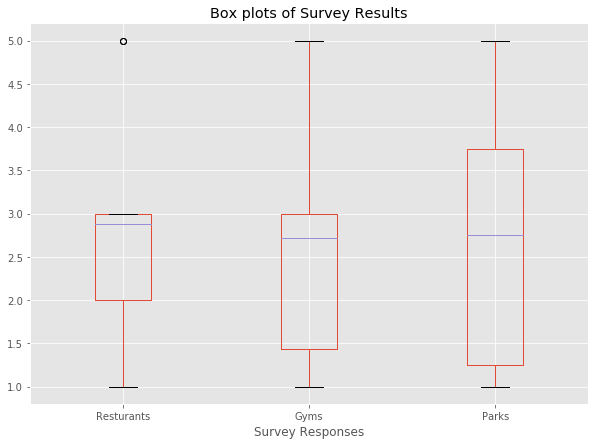

In [13]:
survey_df[['Resturants','Gyms','Parks']].plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Survey Results')
plt.xlabel('Survey Responses')
plt.show()

Calculate the means to determine the ranking of factors that staff want to inform the decision

In [14]:
factors_df=survey_df[['Resturants','Gyms','Parks']].mean(axis=0).reset_index()

In [15]:
factors_df

,index,0
0,Resturants,2.875000
1,Gyms,2.714286
2,Parks,2.750000


In [16]:
factors_df.columns=['Factor','Average']

Rank the factors

In [17]:
factors_df['Rank']=factors_df.index + 1

Show the rank order of factors in order of importance to the employees

In [18]:
factors_df

,Factor,Average,Rank
0,Resturants,2.875000,1
1,Gyms,2.714286,2
2,Parks,2.750000,3


### Neighborhood Dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

Luckily, this dataset exists for free on the web. Feel free to try to find this dataset on your own, but here is the link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

For your convenience, I downloaded the files and placed it on the server, so you can simply run a `wget` command and access the data. So let's go ahead and do that.

In [19]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

/bin/sh: wget: command not found
Data downloaded!


#### Load and explore the data

Next, let's load the data.

In [20]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [21]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [22]:
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [23]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [24]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [25]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [26]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [27]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of Manhattan.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

#### Create a map of Manhattan with neighborhoods superimposed on top.

The company has chosen to relocate into a neighborhood in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [28]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Let's get the geographical coordinates of Manhattan.

In [29]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


As we did with all of New York City, let's visualizat Manhattan the neighborhoods in it.

In [30]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [31]:
CLIENT_ID = 'FD0EOCRMLZBUH0QSGNF0NSNXMPAMT2I5OLGUSGQSAVMDCDZH' # your Foursquare ID
CLIENT_SECRET = 'QXC0KBN1WHQ0I40KKACAPQRC2OS1EBKOWCE0LWBSUJD1IDMS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FD0EOCRMLZBUH0QSGNF0NSNXMPAMT2I5OLGUSGQSAVMDCDZH
CLIENT_SECRET:QXC0KBN1WHQ0I40KKACAPQRC2OS1EBKOWCE0LWBSUJD1IDMS


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [32]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

Get the neighborhood's latitude and longitude values.

In [33]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


#### Now, let's get the top 20 venues that are in Marble Hill within a radius of 200 meters (roughly 1 city block). By focusing on items nearest to the relocation center we will demonstrate to employees we valued their survey responses.

First, let's create the GET request URL. Name your URL **url**.

In [34]:
# type your answer here

LIMIT = 20 # limit of number of venues returned by Foursquare API

radius = 200 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL




'https://api.foursquare.com/v2/venues/explore?&client_id=FD0EOCRMLZBUH0QSGNF0NSNXMPAMT2I5OLGUSGQSAVMDCDZH&client_secret=QXC0KBN1WHQ0I40KKACAPQRC2OS1EBKOWCE0LWBSUJD1IDMS&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=200&limit=20'

Send the GET request and examine the resutls

In [35]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d90bbe8bcbf7a002cfc33d8'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b88e053f964a5208a1132e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d10f951735',
         'name': 'Pharmacy',
         'pluralName': 'Pharmacies',
         'primary': True,
         'shortName': 'Pharmacy'}],
       'id': '4b88e053f964a5208a1132e3',
       'location': {'address': '5237 Broadway',
        'cc': 'US',
        'city': 'Bronx',
        'country': 'United States',
        'crossStreet': '228th Street',
        'distance': 190,
        'formattedAddress': ['5237 Broadway (228th Street)',
         'Bronx, NY 10463',
         'United States'],
        'labeledLatLngs': [

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [36]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [37]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Rite Aid,Pharmacy,40.875467,-73.908906
1,CTown Supermarkets,Supermarket,40.876218,-73.908541
2,Garden Of Eatin',Deli / Bodega,40.874803,-73.910742
3,Terrace View Delicatessen,Deli / Bodega,40.876476,-73.912746


And how many venues were returned by Foursquare?

In [38]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


<a id='item2'></a>

## 2. Explore Neighborhoods in Manhattan

#### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [40]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


Double-click __here__ for the solution.
<!-- The correct answer is:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )
--> 

#### Let's check the size of the resulting dataframe

In [41]:
print(manhattan_venues.shape)
manhattan_venues.head()

(798, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


Let's explore the Venue Categories

In [42]:
#manhattan_venues[['Venue Category']].groupby(['Venue Category']).size().reset_index()

We see that we need to map 'Venue Category' to 'Factors' that the employees ranked for us.  

In [43]:
factors_df

,Factor,Average,Rank
0,Resturants,2.875000,1
1,Gyms,2.714286,2
2,Parks,2.750000,3


Let's map all resturants and bars to 
manhattan_venues[['Venue Category']].groupby(['Venue Category']).size()

In [44]:
#df[df.narr1.str.contains("F[AE]LL.*BI[KC]")]
#manhattan_venues['Venue Category'].str.contains("Restaurant")

In [45]:
# Importing re package for using regular expressions 
import re 

In [46]:
# Function to map venue categories to employee factors 
def Map_Venue_Category(Venue_Category): 
    
    #print (Venue_Category)
    if re.search('Restaurant', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant' 
    
    if re.search('Joint', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant' 
    
    if re.search('Tea Room', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant' 
    
    if re.search('Pizza Place', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant' 
    
    if re.search('Donut Shop', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant' 
    
    if re.search('Coffee Shop', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Bagel Shop', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Bakery', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Bar', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Bistro', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Beer', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Burrito', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Breakfast', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Tea Shop', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Candy', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Café', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Cheese', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Chocolate', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Bridge', Venue_Category, re.IGNORECASE): 
        
        return 'MassTransit'
    
    if re.search('Bus Line', Venue_Category, re.IGNORECASE): 
        
        return 'MassTransit'
    
    if re.search('Community Center', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('Cupcake', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Deli', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Dessert', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Diner', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Dog Run', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Farmers Market', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Food', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Fountain', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('Yogurt', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Gourmet', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('Grocery', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Gym', Venue_Category, re.IGNORECASE): 
        
        return 'Gym'
    
    if re.search('Harbor', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('Histor', Venue_Category, re.IGNORECASE): #for historic and history
        
        return 'Park'
    
    if re.search('ice cream', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Liquor', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Memorial', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('Pie', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Poke Place', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Pool', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('Snack', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Steak', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Taco', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Tennis Stadium', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('Trail', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('Field', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('Spa', Venue_Category, re.IGNORECASE): 
        
        return 'Gym'
    
    if re.search('Golf Course', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Playground', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Plaza', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('Basketball Court', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('GastroPub', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Momument', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('Sandwich', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Gastro', Venue_Category, re.IGNORECASE): 
        
        return 'Restaurant'
    
    if re.search('Tennis', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    if re.search('Waterfront', Venue_Category, re.IGNORECASE): 
        
        return 'Park'
    
    else: 
        # if clean up needed return the same name 
        return Venue_Category 
          
# Set the Employee Venue Category
manhattan_venues['Employee_Venue_Category'] = manhattan_venues['Venue Category'].apply(Map_Venue_Category)
  
# Print the updated dataframe 
manhattan_venues[['Employee_Venue_Category']].groupby(['Employee_Venue_Category']).size()

Employee_Venue_Category
Accessories Store                             1
Adult Boutique                                1
Animal Shelter                                1
Antique Shop                                  1
Art Gallery                                   4
Art Museum                                    1
Arts & Crafts Store                           2
Bank                                          1
Bike Rental / Bike Share                      1
Bike Shop                                     2
Boat or Ferry                                 1
Bookstore                                     7
Boutique                                      5
Building                                      2
Clothing Store                                8
College Academic Building                     1
Comedy Club                                   2
Concert Hall                                  3
Convenience Store                             1
Cooking School                                1
Cosmetics Shop  

Let's check how the venues were returned for each neighborhood

In [47]:
manhattan_venues[['Neighborhood','Employee_Venue_Category']].groupby(['Neighborhood','Employee_Venue_Category']).size()

Neighborhood         Employee_Venue_Category                 
Battery Park City    Boat or Ferry                                1
                     Cooking School                               1
                     Gym                                          1
                     Park                                         6
                     Performing Arts Venue                        1
                     Restaurant                                   8
                     Shopping Mall                                1
                     Smoke Shop                                   1
Carnegie Hill        Bookstore                                    1
                     Dance Studio                                 1
                     Gym                                          5
                     Park                                         2
                     Restaurant                                   9
                     Shoe Store                       

#### Let's find out how many unique categories can be curated from all the returned venues

In [48]:
print('There are {} unique employee venue categories.'.format(len(manhattan_venues['Employee_Venue_Category'].unique())))

There are 92 unique employee venue categories.


<a id='item3'></a>

## 3. Analyze Each Neighborhood by Employee Mapped Venue Categories

In [49]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Employee_Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Animal Shelter,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Bank,Bike Rental / Bike Share,Bike Shop,Boat or Ferry,Bookstore,Boutique,Building,Clothing Store,College Academic Building,Comedy Club,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Cycle Studio,Dance Studio,Department Store,Discount Store,Doctor's Office,Duty-free Shop,Furniture / Home Store,Garden Center,Gas Station,General Entertainment,Gift Shop,Gym,Heliport,Hobby Shop,Hostel,Hotel,Indie Movie Theater,Indie Theater,Jazz Club,Jewelry Store,Library,Lingerie Store,Lounge,Market,Martial Arts Dojo,MassTransit,Men's Store,Miscellaneous Shop,Monument / Landmark,Movie Theater,Museum,Music School,Music Venue,Newsstand,Nightclub,Noodle House,Opera House,Optical Shop,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Park,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pub,Public Art,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,School,Shoe Store,Shopping Mall,Smoke Shop,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,Supermarket,Supplement Shop,Theater,Thrift / Vintage Store,Tourist Information Center,Veterinarian,Video Game Store,Video Store,Wine Shop,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [50]:
manhattan_onehot.shape

(798, 93)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [51]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Animal Shelter,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Bank,Bike Rental / Bike Share,Bike Shop,Boat or Ferry,Bookstore,Boutique,Building,Clothing Store,College Academic Building,Comedy Club,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Cycle Studio,Dance Studio,Department Store,Discount Store,Doctor's Office,Duty-free Shop,Furniture / Home Store,Garden Center,Gas Station,General Entertainment,Gift Shop,Gym,Heliport,Hobby Shop,Hostel,Hotel,Indie Movie Theater,Indie Theater,Jazz Club,Jewelry Store,Library,Lingerie Store,Lounge,Market,Martial Arts Dojo,MassTransit,Men's Store,Miscellaneous Shop,Monument / Landmark,Movie Theater,Museum,Music School,Music Venue,Newsstand,Nightclub,Noodle House,Opera House,Optical Shop,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Park,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pub,Public Art,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,School,Shoe Store,Shopping Mall,Smoke Shop,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,Supermarket,Supplement Shop,Theater,Thrift / Vintage Store,Tourist Information Center,Veterinarian,Video Game Store,Video Store,Wine Shop,Women's Store,Yoga Studio
0,Battery Park City,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.05,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.300000,0.05,0.000000,0.00,0.00,0.00,0.00,0.00,0.40,0.0,0.00,0.00,0.00,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Carnegie Hill,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.25,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.100000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.45,0.0,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00
2,Central Harlem,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.05,0.000000,0.00,0.00,0.00,0.00,0.00,0.05,0.0,0.05,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.75,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Chelsea,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.05,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.1,0.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Chinatown,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.000000,0.00,0.00,0.05,0.000000,0.00,0.00,0.05,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.0,0.1,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.65,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Civic Center,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.05,0.00,0.20,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0

#### Let's confirm the new size

In [52]:
manhattan_grouped.shape

(40, 93)

#### Let's print each neighborhood along with the top 5 most common venues

In [53]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                   venue  freq
0             Restaurant  0.40
1                   Park  0.30
2  Performing Arts Venue  0.05
3         Cooking School  0.05
4          Shopping Mall  0.05


----Carnegie Hill----
          venue  freq
0    Restaurant  0.45
1           Gym  0.25
2          Park  0.10
3     Wine Shop  0.05
4  Dance Studio  0.05


----Central Harlem----
          venue  freq
0    Restaurant  0.75
1  Cycle Studio  0.05
2   Music Venue  0.05
3       Library  0.05
4     Jazz Club  0.05


----Chelsea----
        venue  freq
0  Restaurant  0.70
1   Nightclub  0.10
2     Theater  0.10
3       Hotel  0.05
4   Speakeasy  0.05


----Chinatown----
           venue  freq
0     Restaurant  0.65
1   Noodle House  0.10
2         Museum  0.05
3  Garden Center  0.05
4      Bike Shop  0.05


----Civic Center----
                   venue  freq
0             Restaurant  0.50
1                    Gym  0.20
2           Dance Studio  0.05
3                   Park  0.05
4

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Restaurant,Park,Performing Arts Venue,Cooking School,Gym,Boat or Ferry,Shopping Mall,Smoke Shop,Gas Station,Discount Store
1,Carnegie Hill,Restaurant,Gym,Park,Bookstore,Wine Shop,Shoe Store,Dance Studio,General Entertainment,Discount Store,Doctor's Office
2,Central Harlem,Restaurant,Cycle Studio,Library,Jazz Club,Music Venue,Gym,Gift Shop,Discount Store,Doctor's Office,Duty-free Shop
3,Chelsea,Restaurant,Theater,Nightclub,Speakeasy,Hotel,Yoga Studio,Discount Store,Doctor's Office,Duty-free Shop,Furniture / Home Store
4,Chinatown,Restaurant,Noodle House,Gym,Garden Center,Museum,Hotel,Bike Shop,Yoga Studio,Doctor's Office,Duty-free Shop


<a id='item4'></a>

## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [56]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 1, 1, 1, 2, 4, 1, 1, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [57]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Restaurant,Yoga Studio,Supplement Shop,Pharmacy,Park,Discount Store,Gym,Bank,Department Store,Miscellaneous Shop
1,Manhattan,Chinatown,40.715618,-73.994279,1,Restaurant,Noodle House,Gym,Garden Center,Museum,Hotel,Bike Shop,Yoga Studio,Doctor's Office,Duty-free Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Restaurant,Park,Wine Shop,Market,Gym,Discount Store,Doctor's Office,Duty-free Shop,Furniture / Home Store,Garden Center
3,Manhattan,Inwood,40.867684,-73.921210,1,Restaurant,Park,Yoga Studio,Wine Shop,Veterinarian,Pet Store,General Entertainment,Department Store,Discount Store,Doctor's Office
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1,Restaurant,Yoga Studio,Smoke Shop,Park,Pub,Art Gallery,Gym,Adult Boutique,Doctor's Office,Duty-free Shop


Finally, let's visualize the resulting clusters

In [58]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [59]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Roosevelt Island,Restaurant,Park,Gym,Residential Building (Apartment / Condo),Indie Theater,Outdoors & Recreation,School,Yoga Studio,Garden Center,Discount Store
28,Battery Park City,Restaurant,Park,Performing Arts Venue,Cooking School,Gym,Boat or Ferry,Shopping Mall,Smoke Shop,Gas Station,Discount Store
37,Stuyvesant Town,Restaurant,Park,Pet Service,Heliport,Gas Station,Yoga Studio,General Entertainment,Discount Store,Doctor's Office,Duty-free Shop


#### Cluster 2

In [60]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Restaurant,Noodle House,Gym,Garden Center,Museum,Hotel,Bike Shop,Yoga Studio,Doctor's Office,Duty-free Shop
2,Washington Heights,Restaurant,Park,Wine Shop,Market,Gym,Discount Store,Doctor's Office,Duty-free Shop,Furniture / Home Store,Garden Center
3,Inwood,Restaurant,Park,Yoga Studio,Wine Shop,Veterinarian,Pet Store,General Entertainment,Department Store,Discount Store,Doctor's Office
4,Hamilton Heights,Restaurant,Yoga Studio,Smoke Shop,Park,Pub,Art Gallery,Gym,Adult Boutique,Doctor's Office,Duty-free Shop
5,Manhattanville,Restaurant,Park,Gym,Supermarket,Other Nightlife,Lounge,Indie Movie Theater,Garden Center,Discount Store,Doctor's Office
6,Central Harlem,Restaurant,Cycle Studio,Library,Jazz Club,Music Venue,Gym,Gift Shop,Discount Store,Doctor's Office,Duty-free Shop
7,East Harlem,Restaurant,Dance Studio,Gym,Park,Clothing Store,Pharmacy,Pet Store,Hotel,Hostel,Department Store
9,Yorkville,Restaurant,Wine Shop,Video Store,Park,Monument / Landmark,Hobby Shop,Gym,Yoga Studio,General Entertainment,Discount Store
12,Upper West Side,Restaurant,Bookstore,Movie Theater,Cosmetics Shop,Gift Shop,Pub,Indie Theater,Gas Station,Discount Store,Library
16,Murray Hill,Restaurant,Hotel,Speakeasy,Lounge,Jazz Club,Museum,Yoga Studio,Discount Store,Doctor's Office,Duty-free Shop


#### Cluster 3

In [61]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Restaurant,Yoga Studio,Supplement Shop,Pharmacy,Park,Discount Store,Gym,Bank,Department Store,Miscellaneous Shop
8,Upper East Side,Restaurant,Gym,Hotel,Bookstore,Art Gallery,Jazz Club,Optical Shop,Boutique,Duty-free Shop,Furniture / Home Store
10,Lenox Hill,Restaurant,Gym,Gift Shop,Smoke Shop,Wine Shop,Park,Women's Store,Salad Place,College Academic Building,Discount Store
21,Tribeca,Restaurant,Wine Shop,Park,Yoga Studio,Hotel,Salad Place,Gym,Cycle Studio,Indie Theater,Indie Movie Theater
29,Financial District,Restaurant,Gym,Jewelry Store,Doctor's Office,Monument / Landmark,Park,Salad Place,General Entertainment,Discount Store,Duty-free Shop
30,Carnegie Hill,Restaurant,Gym,Park,Bookstore,Wine Shop,Shoe Store,Dance Studio,General Entertainment,Discount Store,Doctor's Office
32,Civic Center,Restaurant,Gym,Yoga Studio,Monument / Landmark,Park,General Entertainment,Dance Studio,Antique Shop,Indie Theater,Garden Center
34,Sutton Place,Restaurant,Gym,Yoga Studio,Spiritual Center,Adult Boutique,Discount Store,Doctor's Office,Duty-free Shop,Furniture / Home Store,Garden Center


#### Cluster 4

In [62]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Lincoln Square,Concert Hall,Indie Movie Theater,Theater,Performing Arts Venue,Park,Opera House,Library,Gym,School,Gift Shop


#### Cluster 5

In [63]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Clinton,Restaurant,Theater,Gym,Movie Theater,Comedy Club,Sporting Goods Shop,Hotel,Building,Indie Theater,Lounge
15,Midtown,Restaurant,Park,Hotel,Gym,Miscellaneous Shop,Salad Place,Sporting Goods Shop,Clothing Store,Smoke Shop,Yoga Studio
23,Soho,Restaurant,Women's Store,Men's Store,Clothing Store,Yoga Studio,Boutique,Miscellaneous Shop,Optical Shop,Cycle Studio,Dance Studio
38,Flatiron,Restaurant,Gym,Furniture / Home Store,Cycle Studio,Miscellaneous Shop,Sports Club,Wine Shop,Bookstore,Salad Place,Jazz Club
39,Hudson Yards,Restaurant,Music School,Public Art,Park,Gym,Supermarket,Residential Building (Apartment / Condo),Theater,Hotel,Art Gallery


# Results

Find the location that has all of the venues in the rank order chosen by the employees



In [64]:
manhattan_merged.loc[(manhattan_merged['1st Most Common Venue'] == 'Restaurant') & 
                     (manhattan_merged['2nd Most Common Venue'] == 'Gym') & 
                     (manhattan_merged['3rd Most Common Venue'] == 'Park')]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Manhattan,Carnegie Hill,40.782683,-73.953256,2,Restaurant,Gym,Park,Bookstore,Wine Shop,Shoe Store,Dance Studio,General Entertainment,Discount Store,Doctor's Office


## Reccommendation based on results - Carnegie Hill 
Based on the analysis we found that the Neighborhood of Carnegie Hill has all the venues in rank order that the employees of the startup selected in their survey.

# Discussion

The key element of this analysis was clearly the ranking of factors by employees. This was by design as the HR Director wanted to ensure employees felt they were heard and respected in this office relocations.  As a startup it is critical to maintain key staff members.  The analysis that the Data Science team undertook found the one location in Manhattan, NY that met all criteria.

Potentially, the analysis could be tweaked by adding new survey questions for employees or weighting the response of developers and data scientist over others in the company. Also, the search radius around each location could be increased from 200 meters (1 city block) to 500 meters(2.5 city blocks) to get more information on nearby venues.  However, that could lead to noise and potentially overlapping locations.

# Conclusion

The analysis met its desired outcome by identifying the single location in Manhattan that clear matched all the ranked desires of the staff.